# Distance map

## Setup

In [1]:
import os
import matplotlib.pyplot as plt
from amftrack.util.sys import storage_path
from matplotlib import image
import skimage.filters
import cv2
import numpy as np
from scipy import ndimage
from PIL import Image
#%matplotlib notebook

/home/felix/Wks/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
image_path = os.path.join(storage_path, "distance-map", "002_image.bmp")
im = image.imread(image_path)
# im_ = im[1200:2500, 1700:2500]
im_ = im[1400:2200, 1870:2250]

In [3]:
save_path = os.path.join(storage_path, "presentation/Images/distance-map")

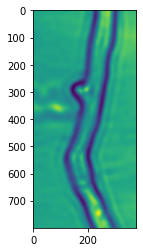

In [4]:
plt.imshow(im_)
plt.savefig(os.path.join(save_path, "im_original"))

## Morphological operations

### Gaussian

In [5]:
im_1 = skimage.filters.gaussian(im_, sigma = 6.0)

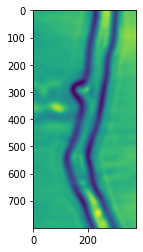

In [6]:
plt.imshow(im_1)

### Threshold

In [7]:
t = skimage.filters.threshold_otsu(im_1)
im_2 = im_1 > t - 0.07

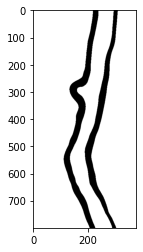

In [8]:
plt.imshow(im_2, cmap = "gray")

### Inverse values

In [9]:
im_2 = im_2 == False

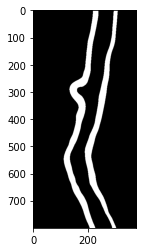

In [10]:
plt.imshow(im_2, cmap = "gray")

### Opening (remove noise)

In [11]:
kernel = np.ones((10,10), dtype = np.uint8)

In [12]:
im_2 = im_2.astype(np.uint8)

In [13]:
im_2_opened = cv2.morphologyEx(im_2, cv2.MORPH_OPEN, kernel)

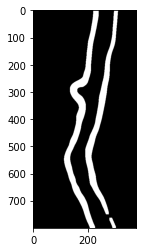

In [14]:
plt.imshow(im_2_opened, cmap="gray")

### Closing (remove the center)

In [15]:
kernel = np.ones((60,60), dtype=np.uint8)

In [16]:
im_2_close = cv2.morphologyEx(im_2, cv2.MORPH_CLOSE, kernel)

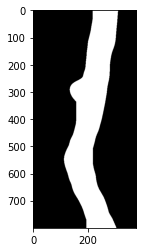

In [17]:
plt.imshow(im_2_close, cmap="gray")

### Erosion

In [18]:
kernel = np.ones((15,15), dtype=np.uint8)

In [19]:
im_2_final = cv2.erode(im_2_close, kernel)

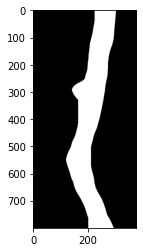

In [20]:
plt.imshow(im_2_final, cmap="gray")

### Distance map

In [21]:
f = ndimage.distance_transform_edt(im_2_final)

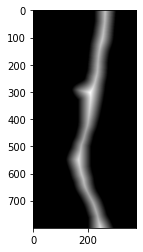

In [22]:
plt.imshow(f, cmap = "gray")

In [23]:
np.max(f)

51.62363799656123

### Thinning

In [40]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
# image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(im_2_final)

In [41]:
skeleton_ = skeleton.astype(np.uint8)

In [42]:
kernel = np.ones((3,3), dtype=np.uint8)

In [43]:
skeleton_dilated = cv2.dilate(skeleton_, kernel)

<IPython.core.display.Javascript object>


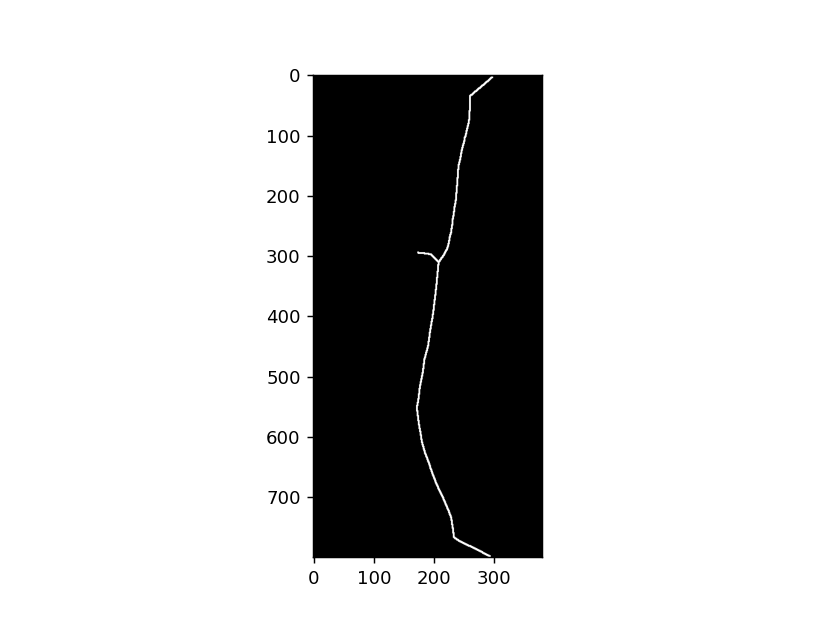

In [44]:
%matplotlib notebook 
plt.imshow(skeleton_dilated, cmap="gray")

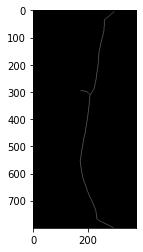

In [26]:
plt.imshow(skeleton, cmap = "gray")

In [ ]:
# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

In [ ]:
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()